# Long-term

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
#plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')
import seaborn as sns
import math
import gc
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.time import SimultaneousActivation
from mesa.datacollection import DataCollector
import random

%matplotlib inline

In [85]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))


### Model inputs

In the model health states are declared as:
- a0: *susceptible to both breast - and ovarian cancer*
- a1: *susceptible to ovarian cancer only (assumed not susceptible to a second (relative) or third (index) round of bc*
- a2: *susceptible to breast cancer only (survivor of ovarian cancer)*
- b0: *breast cancer diagnosis*
- b1: *breast cancer stage 1*
- b2: *breast cancer stage 2*
- b3: *breast cancer stage 3*
- b4: *breast cancer stage 4*
- c0: *ovarian cancer diagnosis*
- c1: *ovarian cancer local*
- c2: *ovarian cancer regional*
- c3: *ovarian cancer distant*
- d0: *prophylactic masectomy and oophorectomy*
- d1: *prophylactic masectomy only*
- d2: *prophylactic oophorectomy only*
- e0: *no increased risk for cancer in respective organs (following successful d0)*
- f0: *dead from any cause ('normal' mortality + exces mortality due to organ specific cancer)*
- f1: *dead from breast cancer*
- f2: *dead from ovarian cancer*

#### Transition probability sets

In [3]:
from Transitions import *

C:\Users\larsasp\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\common.py:1920: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype)


## Model specification

#### Set starting age

In [4]:
from Controls import initial_age
initial_age

In [5]:
def append_time(time):
    t = time.append(1)
    return t

In [6]:
def time_in_state(time):
    t = len(time)
    return t

In [7]:
from mesa import Agent, Model

class Person(Agent):
    """An agent"""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.age = initial_age.value
        self.state_a0 = 1
        self.state_a1 = 0
        self.state_a2 = 0
#        self.state_a2r = 0
        self.state_b0 = 0
        self.state_b1 = 0
        self.state_b2 = 0
        self.state_b3 = 0
        self.state_b4 = 0
        self.state_c0 = 0 
        self.state_c1 = 0
        self.state_c2 = 0
        self.state_c3 = 0
        self.state_d0 = 0
        self.state_d1 = 0
        self.state_d2 = 0
        self.state_e0 = 0
        self.state_f0 = 0
        self.state_f1 = 0
        self.state_f2 = 0
        self.t_b1 = []
        self.t_b2 = []
        self.t_b3 = []
        self.t_b4 = []
        self.t_c1 = []
        self.t_c2 = []
        self.t_c3 = []
        self.cycle = 0
        
    def step(self):
        """
        state a0 is the starting state for all agents in self.cycle = 0
        """
        if self.cycle > 0:
            if self.state_a0 == 1:
                if from_a0(self.age)[1] == 1:
                    self.state_b0 += 1
                    self.state_a0 -= 1
                    self.age += 1
                elif from_a0(self.age)[2] == 1:
                    self.state_c0 += 1
                    self.state_a0 -= 1
                    self.age += 1
                elif from_a0(self.age)[3] == 1:
                    self.state_d0 += 1
                    self.state_a0 -= 1
                    self.age += 1
                elif from_a0(self.age)[4] == 1:
                    self.state_d1 += 1
                    self.state_a0 -= 1
                    self.age += 1
                elif from_a0(self.age)[5] == 1:
                    self.state_d2 += 1
                    self.state_a0 -= 1
                    self.age += 1
                elif from_a0(self.age)[6] == 1:
                    self.state_f0 += 1
                    self.state_a0 -= 1
                else:
                    self.state_a0 += 0
                    self.age += 1
                
                
            elif self.state_a1 == 1:
                if from_a1(age = self.age)[0] == 1:
                    self.state_a1 += 0
                    self.age += 1
                elif from_a1(age = self.age)[1] == 1:
                    self.state_c0 += 1
                    self.state_a1 -= 1
                    self.age += 1
                elif from_a1(age = self.age)[2] == 2:
                    self.state_d2 += 1
                    self.state_a1 -= 1
                    self.age += 1
                else:
                    self.state_f0 += 1
                    self.state_a1 -= 1
                        
            elif self.state_a2 == 1:
                if from_a2(age = self.age)[0] == 1:
                    self.state_a2 += 0
                    self.age += 1
                elif from_a2(age = self.age)[1] == 1:
                    self.state_b0 += 1
                    self.state_a2 -= 1
                    self.age += 1
                elif from_a2(age = self.age)[3] == 1:
                    self.state_d1 += 1
                    self.state_a2 -= 1
                    self.age += 1
                else:
                    self.state_f0 += 1
                    self.state_a2 -= 1
                        
#                if self.state_a2r == 1:
#                    if from_a2r(age = self.age)[0] == 1:
#                        self.state_a2 += 0
#                        self.age += 1
#                    if from_a2r(age = self.age)[1] == 1:
#                        self.state_b0 += 1
#                        self.state_a2 -= 1
#                        self.age += 1
#                    if from_a2r(age = self.age)[3] == 1:
#                        self.state_d1 += 1
#                        seøf.state_a2 -= 1
#                        self.age += 1
#                    else:
#                        self.state_f0 += 1
#                        self.state_a2 -= 1

            elif self.state_b0 == 1:
                if from_b0(age = self.age)[0] == 1:
                    self.state_b1 += 1
                    self.state_b0 -= 1
                elif from_b0(age = self.age)[1] == 1:
                    self.state_b2 += 1
                    self.state_b0 -= 1
                elif from_b0(age = self.age)[2] == 1:
                    self.state_b3 += 1
                    self.state_b0 -= 1
                else:
                    self.state_b4 += 1
                    self.state_b0 -= 1
                        
            elif self.state_b1 == 1:
                if from_b1(self.age, time_in_state(self.t_b1))[1] == 1:
                    self.state_f1 += 1
                    self.state_b1 -= 1
                elif from_b1(self.age, time_in_state(self.t_b1))[2] == 1:
                    self.state_a1 += 1
                    self.state_b1 -= 1
                    self.age += 1
                else:
                    append_time(self.t_b1)
                    self.state_b1 += 0                    
                    self.age += 1
                        

            elif self.state_b2 == 1:
                if from_b2(self.age, time_in_state(self.t_b2))[1] == 1:
                    self.state_f1 += 1
                    self.state_b2 -= 1          
                elif from_b2(self.age, time_in_state(self.t_b2))[2] == 1:
                    self.state_a1 +=1
                    self.state_b2 -=1
                    self.age += 1
                else:
                    append_time(self.t_b2)
                    self.state_b2 += 0
                    self.age += 1


            elif self.state_b3 == 1:
                if from_b3(self.age, time_in_state(self.t_b3))[1] == 1:
                    self.state_f1 += 1
                    self.state_b3 -= 1          
                elif from_b3(self.age, time_in_state(self.t_b3))[2] == 1:
                    self.state_a1 +=1
                    self.state_b3-=1
                    self.age += 1
                else:
                    append_time(self.t_b3)
                    self.state_b3 += 0
                    self.age += 1
                        
                        
            elif self.state_b4 == 1:
                if from_b4(self.age, time_in_state(self.t_b4))[1] == 1:
                    self.state_f1 += 1
                    self.state_b4 -= 1          
                elif from_b4(self.age, time_in_state(self.t_b4))[2] == 1:
                    self.state_a1 +=1
                    self.state_b4 -=1
                    self.age += 1
                else:
                    append_time(self.t_b4)
                    self.state_b4 += 0
                    self.age += 1
                     
      
            elif self.state_c0 == 1:
                if from_c0()[0] == 1:
                    self.state_c1 += 1
                    self.state_c0 -= 1
                elif from_c0()[1] == 1:
                    self.state_c2 += 1
                    self.state_c0 -= 1
                else:
                    self.state_c3 += 1
                    self.state_c0 -= 1
                        
                
            elif self.state_c1 == 1:
                if from_c1(self.age, time_in_state(self.t_c1))[1] == 1:
                    self.state_f2 += 1
                    self.state_c1 -= 1
                elif from_c1(self.age, time_in_state(self.t_c1))[2] == 1:
                    self.state_a2 += 1
                    self.state_c1 -=1
                    self.age +=1
                else:
                    append_time(self.t_c1)
                    self.state_c1 += 0
                    self.age +=1
                    
                        
            elif self.state_c2 == 1:
                if from_c2(self.age, time_in_state(self.t_c2))[1] == 1:
                    self.state_f2 += 1
                    self.state_c2 -= 1
                elif from_c2(self.age, time_in_state(self.t_c2))[2] == 1:
                    self.state_a2 += 1
                    self.state_c2 -=1
                    self.age +=1
                else:
                    append_time(self.t_c2)
                    self.state_c2 += 0
                    self.age +=1
                
            elif self.state_c3 == 1:
                if from_c3(self.age, time_in_state(self.t_c3))[1] == 1:
                    self.state_f2 += 1
                    self.state_c3 -= 1
                elif from_c3(self.age, time_in_state(self.t_c3))[2] == 1:
                    self.state_a2 += 1
                    self.state_c3 -=1
                    self.age +=1
                else:
                    append_time(self.t_c3)
                    self.state_c3 += 0
                    self.age +=1
                        
            elif self.state_d0 == 1:
                if from_d0(age = self.age) == 1:
                    self.state_d0 += 0
                    self.age += 1
                else:
                    self.state_f0 += 1
                    self.state_d0 -= 1
                        
            elif self.state_d1 == 1:
                if from_d1(age = self.age) == 1:
                    self.state_d1 += 0
                    self.age += 1
                else:
                    self.state_f0 += 1
                    self.state_d1 -= 1        
                        
            elif self.state_d2 == 1:
                if from_d2(age = self.age) == 1:
                    self.state_d2 += 0
                    self.age += 1
                else:
                    self.state_f0 += 1
                    self.state_d2 -= 1
                        
            elif self.state_e0 == 1:
                if from_e0(age = self.age) == 1:
                    self.state_e0 += 0
                    self.age += 1
                else:
                    self.state_f0 += 1
                    self.state_e0 -= 1
                        
        self.cycle += 1

In [8]:
def trace_a0(model):
    agent_a0 = [agent.state_a0 for agent in model.schedule.agents]
    x = sum(agent_a0)
    N = model.num_agents
    B = x / N
    return x

def trace_a1(model):
    agent_a1 = [agent.state_a1 for agent in model.schedule.agents]
    x = sum(agent_a1)
    N = model.num_agents
    B = x / N
    return x

def trace_a2(model):
    agent_a2 = [agent.state_a2 for agent in model.schedule.agents]
    x = sum(agent_a2)
    N = model.num_agents
    B = x / N
    return x

#def trace_A2r(model):
#    agent_a2r = [agent.state_A2r for agent in model.schedule.agents]
#    x = sum(agent_a2r)
#    N = model.num_agents
#    B = x / N
#    return B

def trace_b1(model):
    agent_b1 = [agent.state_b1 for agent in model.schedule.agents]
    x = sum(agent_b1)
    N = model.num_agents
    B = x / N
    return x

def trace_b2(model):
    agent_b2 = [agent.state_b2 for agent in model.schedule.agents]
    x = sum(agent_b2)
    N = model.num_agents
    B = x / N
    return x

def trace_b3(model):
    agent_b3 = [agent.state_b3 for agent in model.schedule.agents]
    x = sum(agent_b3)
    N = model.num_agents
    B = x / N
    return x

def trace_b4(model):
    agent_b4 = [agent.state_b4 for agent in model.schedule.agents]
    x = sum(agent_b4)
    N = model.num_agents
    B = x / N
    return x

def trace_c1(model):
    agent_c1 = [agent.state_c1 for agent in model.schedule.agents]
    x = sum(agent_c1)
    N = model.num_agents
    B = x / N
    return x

def trace_c2(model):
    agent_c2 = [agent.state_c2 for agent in model.schedule.agents]
    x = sum(agent_c2)
    N = model.num_agents
    B = x / N
    return x

def trace_c3(model):
    agent_c3 = [agent.state_c3 for agent in model.schedule.agents]
    x = sum(agent_c3)
    N = model.num_agents
    B = x / N
    return x

def trace_e0(model):
    agent_e0 = [agent.state_e0 for agent in model.schedule.agents]
    x = sum(agent_e0)
    N = model.num_agents
    B = x / N
    return x

def trace_f0(model):
    agent_f0 = [agent.state_f0 for agent in model.schedule.agents]
    x = sum(agent_f0)
    N = model.num_agents
    B = x / N
    return x

def trace_f1(model):
    agent_f1 = [agent.state_f1 for agent in model.schedule.agents]
    x = sum(agent_f1)
    N = model.num_agents
    B = x / N
    return x

def trace_f2(model):
    agent_f2 = [agent.state_f2 for agent in model.schedule.agents]
    x = sum(agent_f2)
    N = model.num_agents
    B = x / N
    return x


In [9]:
class hboc(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = N
        self.cycle  = 0
        self.schedule = RandomActivation(self)
        
        # Create agents
        for i in range(self.num_agents):
            a = Person(i, self)
            self.schedule.add(a)    
        # Store data after each step
        self.datacollector = DataCollector(model_reporters=
                                           {"a0": trace_a0,
                                            "a1": trace_a1,
                                            "a2": trace_a2,
                                            "b1": trace_b1,
                                            "b2": trace_b2,
                                            "b3": trace_b3,
                                            "b4": trace_b4,
                                            "c1": trace_c1,
                                            "c2": trace_c2,
                                            "c3": trace_c3,
                                            "f1": trace_f0,
                                            "f2": trace_f1,
                                            "f3": trace_f2},
                                          agent_reporters={
                                             "a0": lambda a: a.state_a0,
                                             "a1": lambda a: a.state_a1,
                                             "a2": lambda a: a.state_a2,
                                             "b1": lambda a: a.state_b1,
                                             "b2": lambda a: a.state_b2,
                                             "b3": lambda a: a.state_b3,
                                             "b4": lambda a: a.state_b4,
                                             "c1": lambda a: a.state_c1,
                                             "c2": lambda a: a.state_c2,
                                             "c3": lambda a: a.state_c3,
                                             "f0": lambda a: a.state_f0,
                                             "f1": lambda a: a.state_f1,
                                             "f2": lambda a: a.state_f2}
                                          )
        
    def step(self):
        # store data  
        self.datacollector.collect(self)
                
        #advnace a step
        self.schedule.step()

## Run

In [31]:
%%time
model = hboc(10000)
for i in range(51):
    model.step()


Wall time: 6min 53s


## Agent-level output

In [32]:
all_agent_movement = model.datacollector.get_agent_vars_dataframe()
all_agent_movement.to_csv('Agents.csv')
df = pd.read_csv('Agents.csv')
df

,Step,AgentID,b4,a0,f2,c2,a1,b3,c1,f1,f0,a2,b2,c3,b1
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,7,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,9,0,1,0,0,0,0,0,0,0,0,0,0,0


In [33]:
df2 = df.groupby('AgentID')['a0','a1', 'a2', 'b1', 'b2', 'b3', 'b4', 'c1', 'c2', 'c3', 'f0', 'f1', 'f2'].sum()
df2

,a0,a1,a2,b1,b2,b3,b4,c1,c2,c3,f0,f1,f2
AgentID,,,,,,,,,,,,,
0,36,0,0,0,0,0,0,0,0,0,15,0,0
1,19,0,0,0,0,0,0,0,0,0,32,0,0
2,4,0,0,0,0,0,0,0,0,0,47,0,0
3,19,0,0,0,0,0,0,0,0,0,32,0,0
4,2,0,0,0,0,0,0,0,0,0,49,0,0
5,11,0,0,0,0,0,0,0,0,0,40,0,0
6,41,0,0,0,0,0,0,0,0,0,10,0,0
7,10,26,0,0,5,0,0,0,0,0,9,0,0
8,9,8,0,5,0,0,0,0,0,0,28,0,0


### Check: how long in breast cancer state if impacted? (Should not exceed 5)

In [34]:
b = df2[((df2.b1 > 0) & (df2.a1 > 0)) | (((df2.b2 > 0) & (df2.a1 > 0))) | (((df2.b3 > 0) & (df2.a1 > 0))) | ((df2.b4 > 0) & (df2.a1 > 0))]

In [35]:
b

,a0,a1,a2,b1,b2,b3,b4,c1,c2,c3,f0,f1,f2
AgentID,,,,,,,,,,,,,
7,10,26,0,0,5,0,0,0,0,0,9,0,0
8,9,8,0,5,0,0,0,0,0,0,28,0,0
15,4,27,0,5,0,0,0,0,0,0,14,0,0
17,5,18,0,5,0,0,0,0,0,0,22,0,0
19,2,26,0,5,0,0,0,0,0,0,17,0,0
25,34,10,0,0,5,0,0,0,0,0,1,0,0
38,19,15,0,5,0,0,0,0,0,0,11,0,0
40,2,24,0,0,0,0,5,0,0,0,19,0,0
51,6,11,0,5,0,0,0,0,0,0,28,0,0


In [36]:
b.b1.value_counts()

5    1052
0     508
Name: b1, dtype: int64

In [37]:
b.b2.value_counts()

0    1242
5     318
Name: b2, dtype: int64

In [38]:
b.b3.value_counts()

0    1542
5      18
Name: b3, dtype: int64

In [39]:
b.b4.value_counts()

0    1388
5     172
Name: b4, dtype: int64

### Check: how long in ovarian cancer state if impacted? (Should not exceed 10)

In [40]:
c = df2[(df2.c1 > 0) | (df2.c2 > 0) | (df2.c3 > 0)]
c

,a0,a1,a2,b1,b2,b3,b4,c1,c2,c3,f0,f1,f2
AgentID,,,,,,,,,,,,,
50,12,0,4,0,0,0,0,0,9,0,25,0,0
169,6,0,0,0,0,0,0,0,0,2,0,0,42
207,12,0,0,0,0,0,0,0,0,2,0,0,36
384,15,0,0,0,0,0,0,0,0,5,0,0,30
669,29,0,0,0,0,0,0,0,0,2,0,0,19
720,31,0,0,0,0,0,0,0,0,1,0,0,18
765,17,0,0,0,0,0,0,0,0,3,0,0,30
838,16,0,0,0,0,0,0,0,0,1,0,0,33
991,23,0,0,0,0,0,0,0,0,2,0,0,25


In [41]:
c.c1.value_counts()

0    65
9     5
8     1
2     1
Name: c1, dtype: int64

In [42]:
c.c2.value_counts()

0    59
9     3
1     3
8     2
6     2
2     2
5     1
Name: c2, dtype: int64

In [43]:
c.c3.value_counts()

0    20
1    16
2    10
9     5
4     5
6     4
5     4
3     4
7     3
8     1
Name: c3, dtype: int64

## Model-level output

In [44]:
output = model.datacollector.get_model_vars_dataframe()
output

,a0,a1,a2,b1,b2,b3,b4,c1,c2,c3,f1,f2,f3
0,10000,0,0,0,0,0,0,0,0,0,0,0,0
1,10000,0,0,0,0,0,0,0,0,0,0,0,0
2,9552,0,0,0,0,0,0,0,0,0,271,0,0
3,9132,0,0,91,30,2,49,1,1,3,531,0,0
4,8692,0,0,184,48,4,74,2,2,4,818,19,0
5,8292,0,0,266,69,5,98,2,3,4,1064,42,1
6,7888,0,0,349,84,5,110,2,3,6,1332,83,2
7,7545,0,0,410,99,5,129,2,5,7,1557,119,4
8,7161,124,0,376,88,3,119,2,5,7,1821,168,6
9,6819,233,0,351,85,2,104,2,3,8,2054,217,10


In [45]:
# Det ser kanskje ut som om koden har en bug som gjør at funksjonen med "dersom i state_bi" i 10 år -> a1, 
# den fungerer faktisk, men i o m at denne kreften er såpass sjelden på aggregert nivå, og at den har en økt dødelighet
# ser det slik ut. 

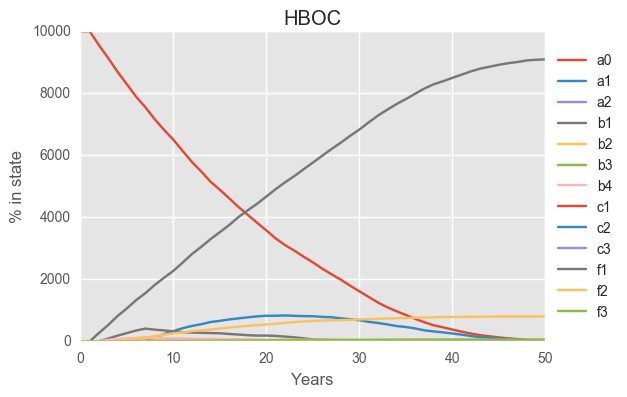

In [46]:
ax = output.plot()
ax.set_xlabel('Years')
ax.set_ylabel('% in state')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('HBOC')
#plt.savefig('M:\pc\Desktop\plot.png', dpi = 400)

## Central figures
- how many of the starting cohort are still alive at age 100 in this base case?
- how many died from breast cancer?
- how many died from ovarian cancer?
- how many cases of breast cancer?
- how many cases of ovarian cancer?

In [58]:
output['cycle'] = np.arange(0, 51, 1, dtype = int)

In [61]:
output.set_index('cycle')

,a0,a1,a2,b1,b2,b3,b4,c1,c2,c3,f1,f2,f3
cycle,,,,,,,,,,,,,
0,10000,0,0,0,0,0,0,0,0,0,0,0,0
1,10000,0,0,0,0,0,0,0,0,0,0,0,0
2,9552,0,0,0,0,0,0,0,0,0,271,0,0
3,9132,0,0,91,30,2,49,1,1,3,531,0,0
4,8692,0,0,184,48,4,74,2,2,4,818,19,0
5,8292,0,0,266,69,5,98,2,3,4,1064,42,1
6,7888,0,0,349,84,5,110,2,3,6,1332,83,2
7,7545,0,0,410,99,5,129,2,5,7,1557,119,4
8,7161,124,0,376,88,3,119,2,5,7,1821,168,6


In [71]:
alive_start = output.loc[0, 'a0']

In [72]:
alive_start

10000

In [74]:
dead_end = output.loc[50, ['f1', 'f2', 'f3']]

In [75]:
dead_end

f1    9096
f2     803
f3      59
Name: 50, dtype: int64

In [79]:
alive_end = alive_start - (dead_end.f1 + dead_end.f2 + dead_end.f3)

In [80]:
alive_end

42

#### How many alive at end? (analgous to life-years gained later)

Of 10 000 at start, 42 is alive at age 100.

#### How many died from breast cancer?

In [87]:
dead_end.f2

803

Less than 10 % will die from breast cancer

#### How many died from ovarian cancer?

In [88]:
dead_end.f3

59

Less than 1 % will die from ovarian cancer

#### How many cases of breast cancer?

In [111]:
b1 = df2[(df2.b1 > 0)]

In [114]:
cases_b1 = len(b1)

In [115]:
b2 = df2[(df2.b2 > 0)]

In [116]:
cases_b2 = len(b2)

In [117]:
b3 = df2[(df2.b3 > 0)]

In [118]:
cases_b3 = len(b3)

In [119]:
b4 = df2[(df2.b4 > 0)]

In [120]:
cases_b4 = len(b4)

In [121]:
df3 = pd.DataFrame()

In [128]:
df3['stage 1'] = [cases_b1]

In [130]:
df3['state 2'] = [cases_b2]

In [131]:
df3['state 3'] = [cases_b3]

In [132]:
df3['stage 4'] = [cases_b4]

In [178]:
df3['count'] = [cases_b1 + cases_b2 + cases_b3 + cases_b4]

In [179]:
df3.set_index('count')

,stage 1,state 2,state 3,stage 4
count,,,,
2364,1257,438,26,643


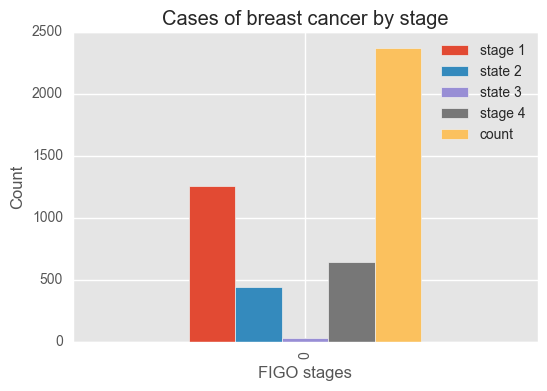

In [213]:
df3.plot(kind= 'bar', title = 'Cases of breast cancer by stage')
plt.xlabel('FIGO stages')
plt.ylabel('Count')

Mostly stage 1 breast cancer, all stage approx 25 % over 50 years.

#### How many cases of ovarian cancer?

In [144]:
c1 = df2[(df2.c1 > 0)]

In [147]:
cases_c1 = len(c1)

In [148]:
c2 = df2[(df2.c2 > 0)]

In [149]:
cases_c2 = len(c2)

In [150]:
c3 = df2[(df2.c3 > 0)]

In [151]:
cases_c3 = len(c3)

In [199]:
df4 = pd.DataFrame()

In [200]:
df4['local'] = [cases_c1]

In [201]:
df4['regional'] = [cases_c2]

In [202]:
df4['distant'] = [cases_c3]

In [203]:
df4['count'] = [cases_c1 + cases_c2 + cases_c3]

In [204]:
df4.set_index('count')

,local,regional,distant
count,,,
72,7,13,52


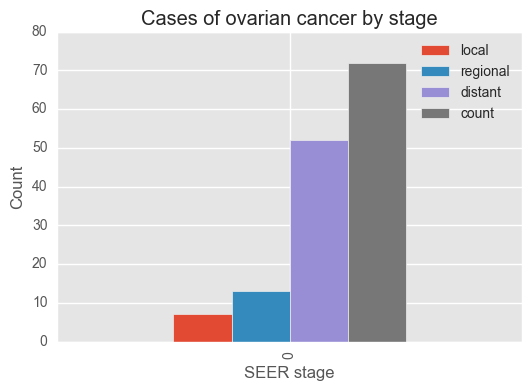

In [205]:
df4.plot(kind= 'bar', title = 'Cases of ovarian cancer by stage')
plt.xlabel('SEER stage')
plt.ylabel('Count')

Mostly distant carcinomas (due to no propper detection method -- but genetic testing could possible improve...) 

So.. What happened to those with ovarian cancer?

In [214]:
c

,a0,a1,a2,b1,b2,b3,b4,c1,c2,c3,f0,f1,f2
AgentID,,,,,,,,,,,,,
50,12,0,4,0,0,0,0,0,9,0,25,0,0
169,6,0,0,0,0,0,0,0,0,2,0,0,42
207,12,0,0,0,0,0,0,0,0,2,0,0,36
384,15,0,0,0,0,0,0,0,0,5,0,0,30
669,29,0,0,0,0,0,0,0,0,2,0,0,19
720,31,0,0,0,0,0,0,0,0,1,0,0,18
765,17,0,0,0,0,0,0,0,0,3,0,0,30
838,16,0,0,0,0,0,0,0,0,1,0,0,33
991,23,0,0,0,0,0,0,0,0,2,0,0,25


In [218]:
c[(c.c1 > 0)]

,a0,a1,a2,b1,b2,b3,b4,c1,c2,c3,f0,f1,f2
AgentID,,,,,,,,,,,,,
2137,10,0,4,0,0,0,0,9,0,0,27,0,0
5073,2,0,21,0,0,0,0,9,0,0,12,0,0
5357,3,0,3,0,0,0,0,9,0,0,35,0,0
6379,11,0,2,0,0,0,0,9,0,0,28,0,0
7328,23,0,0,0,0,0,0,8,0,0,0,0,19
8161,19,0,0,0,0,0,0,2,0,0,0,0,29
9709,9,0,12,0,0,0,0,9,0,0,20,0,0


Local ovarian cancer seems to be survivable if you're young when you get it

In [219]:
c[c.c2 > 0]

,a0,a1,a2,b1,b2,b3,b4,c1,c2,c3,f0,f1,f2
AgentID,,,,,,,,,,,,,
50,12,0,4,0,0,0,0,0,9,0,25,0,0
1348,30,0,0,0,0,0,0,0,8,0,0,0,12
1496,6,0,21,0,0,0,0,0,9,0,14,0,0
2677,3,0,26,0,0,0,0,0,9,0,12,0,0
3198,10,0,0,0,0,0,0,0,2,0,0,0,38
3316,29,0,0,0,0,0,0,0,1,0,0,0,20
4573,27,0,0,0,0,0,0,0,1,0,0,0,22
4642,31,0,0,0,0,0,0,0,1,0,0,0,18
5620,18,0,0,0,0,0,0,0,5,0,0,0,27


Same for regional, but very few make survive more than 10 years, and those who do are quite young.

In [220]:
c[c.c3 > 0]

,a0,a1,a2,b1,b2,b3,b4,c1,c2,c3,f0,f1,f2
AgentID,,,,,,,,,,,,,
169,6,0,0,0,0,0,0,0,0,2,0,0,42
207,12,0,0,0,0,0,0,0,0,2,0,0,36
384,15,0,0,0,0,0,0,0,0,5,0,0,30
669,29,0,0,0,0,0,0,0,0,2,0,0,19
720,31,0,0,0,0,0,0,0,0,1,0,0,18
765,17,0,0,0,0,0,0,0,0,3,0,0,30
838,16,0,0,0,0,0,0,0,0,1,0,0,33
991,23,0,0,0,0,0,0,0,0,2,0,0,25
1321,5,0,0,0,0,0,0,0,0,1,0,0,44


Very few survie distant ovarian cancer for very long, but some do! Is that observed? Need to validate this.

Can also see that if one is impaceted by distant ovarian cancer the loss of life is very high:

In [244]:
died_from_oc = c[(c.c3 > 0) & (c.f2 > 0) & (c.a2 == 0)]

In [245]:
time_to_disease_mu = np.mean(died_from_oc.a0)
time_with_disease_mu = np.mean(died_from_oc.c3)
average_loss = pd.DataFrame()
average_loss['time_to_disease'] = [time_to_disease_mu]
average_loss['time_with_disease'] = [time_with_disease_mu]
average_loss['average life expectancy at 50'] = [time_to_disease_mu + time_with_disease_mu]
average_loss['life-exp at 50y 2015 Norway'] = [35.13]
average_loss['average life-years lost'] = [time_to_disease_mu + time_with_disease_mu - 35.13]

In [246]:
average_loss

,time_to_disease,time_with_disease,average life expectancy at 50,life-exp at 50y 2015 Norway,average life-years lost
0,15.702128,3.0,18.702128,35.13,-16.427872


On average, those who are impaceted by distant ovarian cancer live to the age of 68 years, and the remaining life-expectancy for 50 year old women in Norway in 2015 was 35.13 years.

*A consequence of getting the most severe (and most frequent) form of ovarian cancer at age 66 is a 17 year premature death.*

#### Note: *these are the expected consequences for someone assumed to not be a carrier of any gene known to increase risk of cancer in these organs*. 

# What happens when you are a carrier, and you have an RR >> 1?